<font color=green size=7> Data Scientist </font>                AHMETKURT

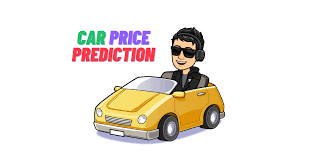

# Car Price Prediction

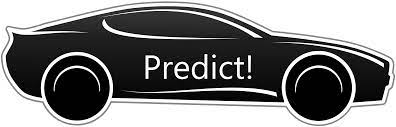

DATA DICTONARY						
						
1	Car_ID			Unique id of each observation (Interger)		
2	Symboling 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
3	carCompany			Name of car company (Categorical)		
4	fueltype			Car fuel type i.e gas or diesel (Categorical)		
5	aspiration			Aspiration used in a car (Categorical)		
6	doornumber			Number of doors in a car (Categorical)		
7	carbody			body of car (Categorical)		
8	drivewheel			type of drive wheel (Categorical)		
9	enginelocation			Location of car engine (Categorical)		
10	wheelbase			Weelbase of car (Numeric)		
11	carlength			Length of car (Numeric)		
12	carwidth			Width of car (Numeric)		
13	carheight			height of car (Numeric)		
14	curbweight			The weight of a car without occupants or baggage. (Numeric)		
15	enginetype			Type of engine. (Categorical)		
16	cylindernumber			cylinder placed in the car (Categorical)		
17	enginesize			Size of car (Numeric)		
18	fuelsystem			Fuel system of car (Categorical)		
19	boreratio			Boreratio of car (Numeric)		
20	stroke			Stroke or volume inside the engine (Numeric)		
21	compressionratio			compression ratio of car (Numeric)		
22	horsepower			Horsepower (Numeric)		
23	peakrpm			car peak rpm (Numeric)		
24	citympg			Mileage in city (Numeric)		
25	highwaympg			Mileage on highway (Numeric)		
26	price(Dependent variable)			Price of car (Numeric)		
						
						**Source: https://archive.ics.uci.edu/ml/datasets/Automobile
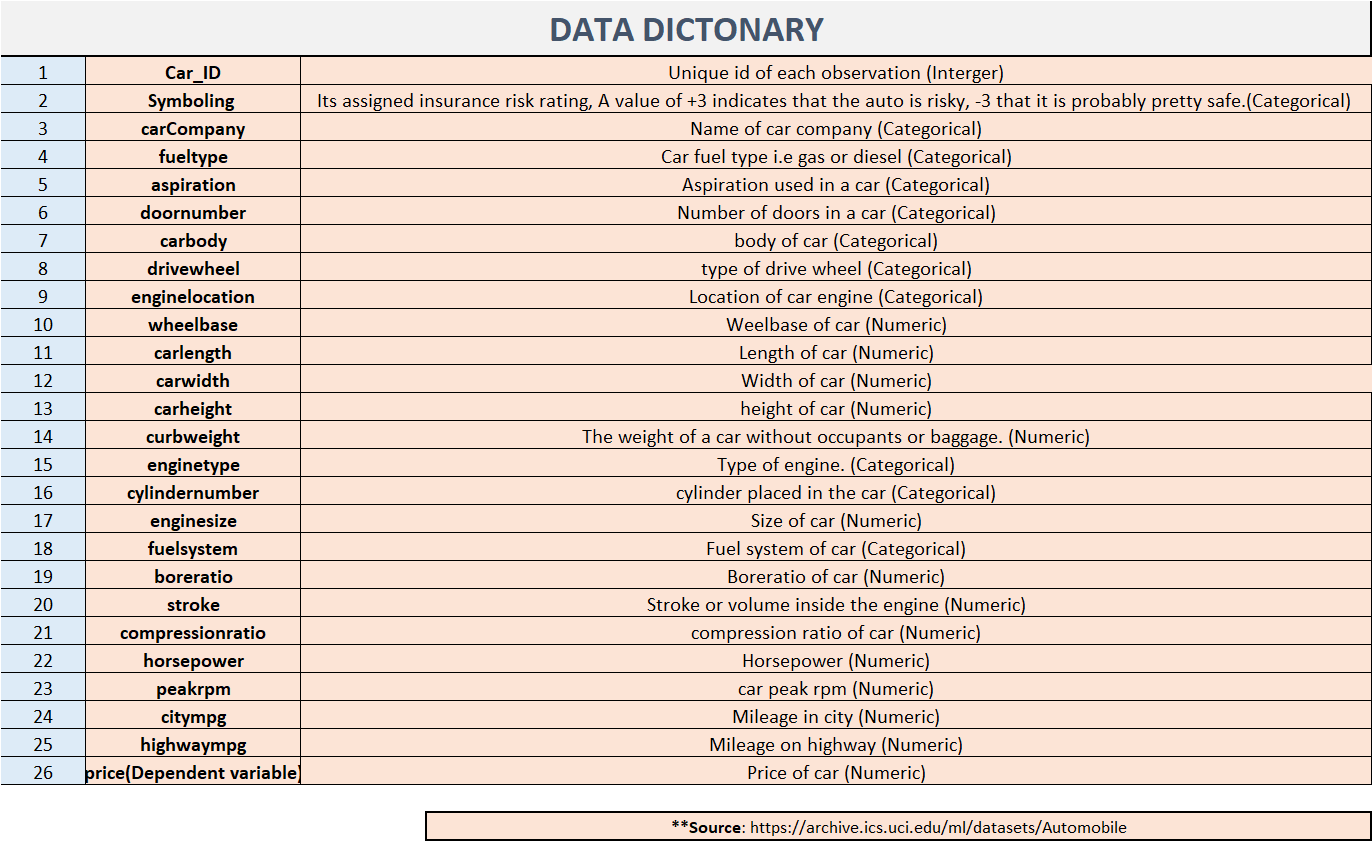

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5074-7CFC

 Directory of C:\Users\Ahmet\Desktop\AI General\Projects\Kaggle projects\4-Car Price Prediction

21.08.2022  16:40    <DIR>          .
21.08.2022  16:40    <DIR>          ..
21.08.2022  16:40    <DIR>          .ipynb_checkpoints
21.08.2022  16:39            26.717 CarPrice_Assignment.csv
21.08.2022  16:39            14.884 Data Dictionary - carprices.xlsx
21.08.2022  16:40                72 Untitled.ipynb
               3 File(s)         41.673 bytes
               3 Dir(s)  64.000.643.072 bytes free


In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
185,186,2,volkswagen type 3,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195.0
84,85,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0
52,53,1,mazda rx2 coupe,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0


In [8]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

df.isnull().sum()

In [11]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

maxda Nissan porcshce toyouta vokswagen

In [14]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
#Checking for duplicates
df.duplicated().sum()

0

In [27]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [28]:
df['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [35]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [29]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [30]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [31]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [32]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [33]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [34]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [36]:
df['wheelbase'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64

In [92]:
df.quantile(.97).astype('int')

car_ID                198
symboling               3
wheelbase             114
carlength             198
carwidth               71
carheight              58
curbweight           3737
enginesize            230
boreratio               3
stroke                  3
compressionratio       22
horsepower            184
peakrpm              6000
citympg                38
highwaympg             45
price               35490
fueleconomy            40
Name: 0.97, dtype: int32

In [37]:
#enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
#citympg, highwaympg - seem to have a significant negative correlation with price.
np.corrcoef(df['carlength'], df['carwidth'])[0, 1]

0.841118268481845

In [39]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [41]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [42]:
df['carsrange'].value_counts()

Budget     95
Medium     86
Highend    24
Name: carsrange, dtype: int64

In [46]:
df_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'fueleconomy', 'carlength','carwidth', 'carsrange']]
df_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [ ]:
# fueleconomy has an obvios negative correlation with price and is significant.

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

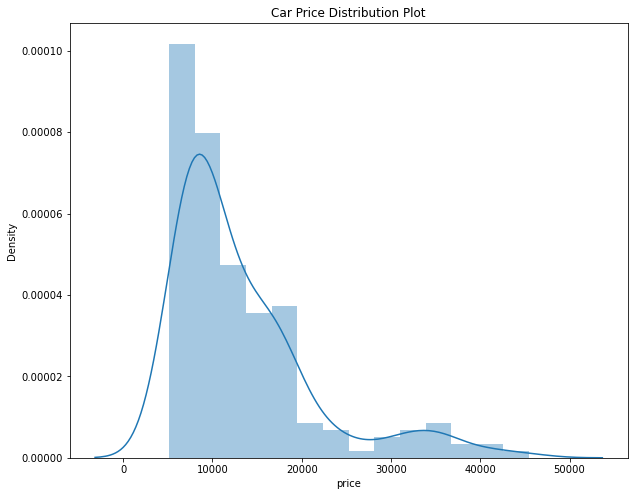

In [23]:
plt.figure(figsize=(10,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

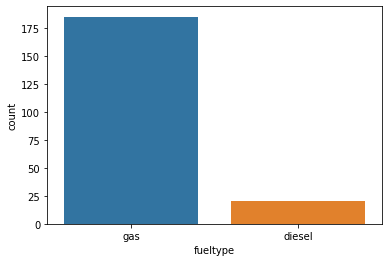

In [93]:
sns.countplot(df['fueltype']);

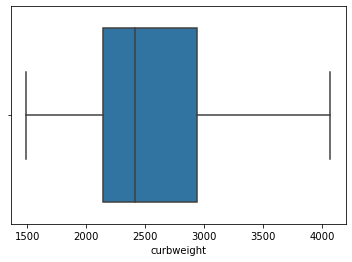

In [98]:
sns.boxplot(df['curbweight']);

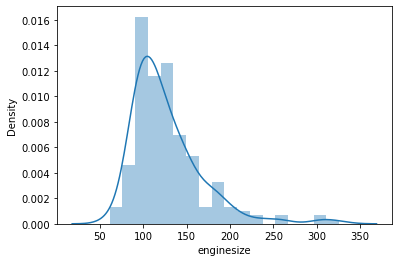

In [101]:
sns.distplot(df['enginesize']);

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

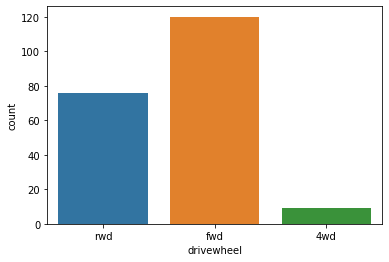

In [96]:
sns.countplot(df['drivewheel'])


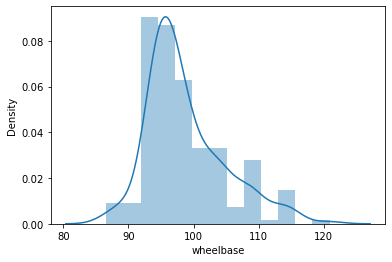

In [97]:
sns.distplot(df['wheelbase']);

<AxesSubplot:xlabel='boreratio', ylabel='count'>

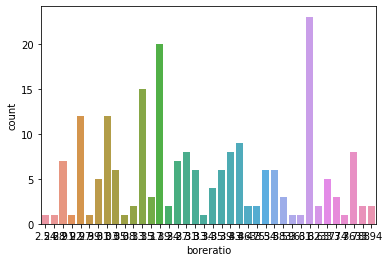

In [102]:
sns.countplot(df['boreratio'])


<AxesSubplot:xlabel='fueleconomy', ylabel='count'>

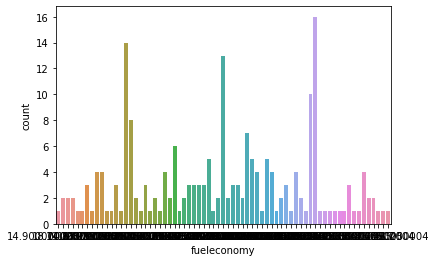

In [104]:
sns.countplot(df['fueleconomy'])


<AxesSubplot:xlabel='carlength', ylabel='count'>

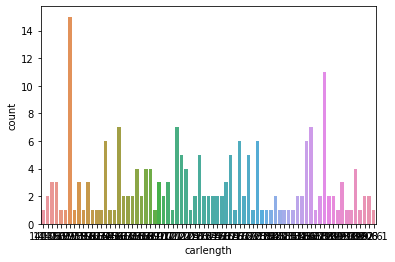

In [105]:
sns.countplot(df['carlength'])


<AxesSubplot:xlabel='horsepower', ylabel='count'>

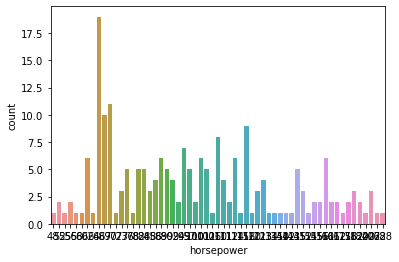

In [103]:
sns.countplot(df['horsepower'])


<Figure size 1800x432 with 0 Axes>

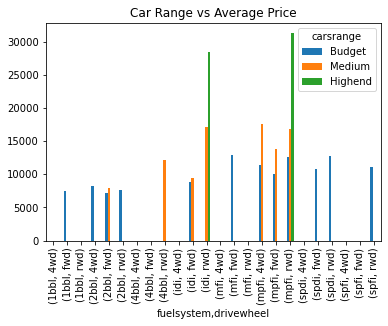

In [44]:
plt.figure(figsize=(25, 6))

df1 = pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df1.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

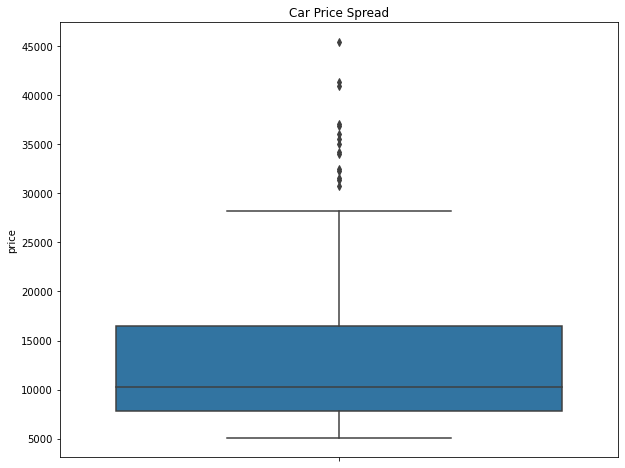

In [22]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

In [57]:
x,y=df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'fueleconomy', 'carlength','carwidth', 'carsrange']],df[['price']]

In [58]:
x=pd.get_dummies(x,drop_first=True)

In [59]:
x.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Medium,carsrange_Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [60]:
y.head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


In [61]:
df.shape

(205, 28)

In [63]:
x.shape,y.shape

((205, 31), (205, 1))

In [64]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=13)

In [65]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape 

((164, 31), (41, 31), (164, 1), (41, 1))

In [81]:
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test)

In [82]:
(mean_squared_error(y_test, y_pred_etr))**0.5

1732.2445540748429

In [83]:
r2_score(y_test, y_pred_etr)

0.9514466270005385

In [84]:
GBR.fit(x_train,y_train)
y_pred_gbr =GBR.predict(x_test)

In [85]:
(mean_squared_error(y_test, y_pred_gbr))**0.5

629.5412185511567

In [86]:
r2_score(y_test, y_pred_gbr)

0.9935871757602363

In [87]:
model=est.fit(x_train,y_train)

In [88]:
y_pred_knb = model.predict(x_test)

In [89]:
(mean_squared_error(y_test, y_pred_knb))**0.5

325.88823312265333

In [90]:
r2_score(y_test, y_pred_knb)

0.9982815442417678

In [91]:
#model.save("arabatrahmin.h") #modelimizi kadeder
#model.load()